In [1]:
import sys,os
import time, datetime
import h5py

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

import pandas as pd

In [2]:
dataPath = '/data/TempSweeps/VNA/'

files = np.array([ ## path date, file date
    [ "20220419" , "20220419" ] ,
    [ "20220725" , "20220725" ] ,
    [ "20220725" , "20220726" ] ,
    [ "20230224" , "20230224" ] ,
    [ "20230224" , "20230225" ] ,
])

fname_base = "MBfits_"

In [17]:
powers_to_plot = [-15, -35, -55]
norm_P = plt.Normalize(vmin=-55,vmax=-15)

In [4]:
all_data = {}

for i in np.arange(len(files[:,0])):
    f_h5_path = os.path.join(dataPath,files[i,0],"MBfits_"+files[i,1]+".h5")
    print(f_h5_path)
    
    fit_df_in = pd.read_hdf(f_h5_path,key='MBfits')
    all_data[files[i,1]] = fit_df_in

/data/TempSweeps/VNA/20220419/MBfits_20220419.h5
/data/TempSweeps/VNA/20220725/MBfits_20220725.h5
/data/TempSweeps/VNA/20220725/MBfits_20220726.h5
/data/TempSweeps/VNA/20230224/MBfits_20230224.h5
/data/TempSweeps/VNA/20230224/MBfits_20230225.h5


/usr/local/share/anaconda3/lib/python3.8/site-packages/tables/attributeset.py:308: DataTypeWarning: Unsupported type for attribute 'fit_to_Qi' in node '/'. Offending HDF5 class: 8
  value = self._g_getattr(self._v_node, name)


In [5]:
print(all_data.keys())

dict_keys(['20220419', '20220725', '20220726', '20230224', '20230225'])


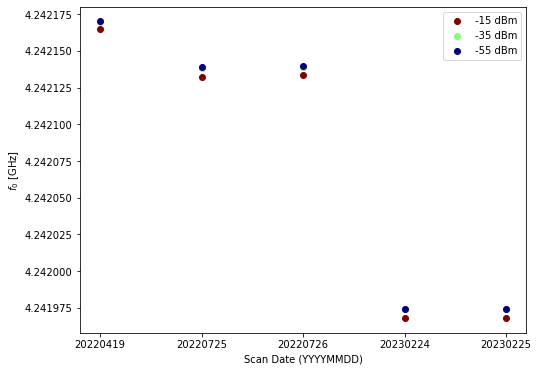

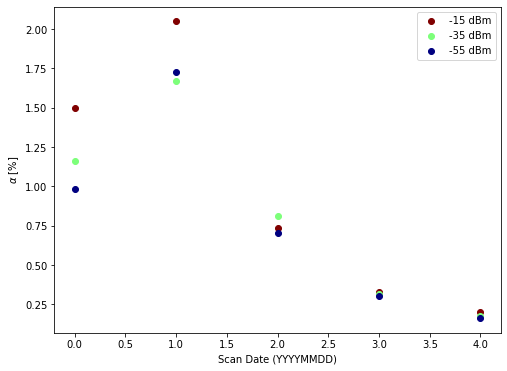

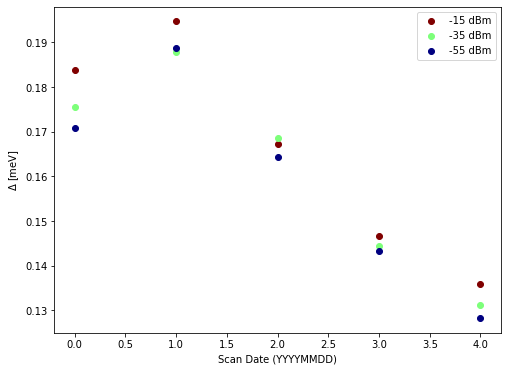

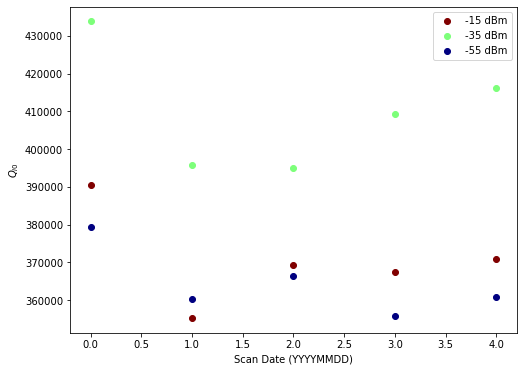

In [29]:
fg1 = plt.figure(figsize=(8,6))
ax1 = fg1.gca()
ax1.set_xlabel("Scan Date (YYYYMMDD)")
ax1.set_ylabel(r"$f_0$ [GHz]")

fg2 = plt.figure(figsize=(8,6))
ax2 = fg2.gca()
ax2.set_xlabel("Scan Date (YYYYMMDD)")
ax2.set_ylabel(r"$\alpha$ [%]")

fg3 = plt.figure(figsize=(8,6))
ax3 = fg3.gca()
ax3.set_xlabel("Scan Date (YYYYMMDD)")
ax3.set_ylabel(r"$\Delta$ [meV]")

fg4 = plt.figure(figsize=(8,6))
ax4 = fg4.gca()
ax4.set_xlabel("Scan Date (YYYYMMDD)")
ax4.set_ylabel(r"$Q_{i0}$")

for i in np.arange(len(files[:,1])):
    key = files[i,1]
    
    for pwr in powers_to_plot:
        ax1.scatter(i, all_data[key]["f0"].loc[all_data[key]["power"]==pwr],marker="o",color=cm.jet(norm_P(pwr)),
                   label=None if i>0 else str(int(pwr))+" dBm")
        ax2.scatter(i, all_data[key]["alpha"].loc[all_data[key]["power"]==pwr]*100.0,marker="o",color=cm.jet(norm_P(pwr)),
                   label=None if i>0 else str(int(pwr))+" dBm")
        ax3.scatter(i, all_data[key]["delta"].loc[all_data[key]["power"]==pwr],marker="o",color=cm.jet(norm_P(pwr)),
                   label=None if i>0 else str(int(pwr))+" dBm")
        ax4.scatter(i, all_data[key]["Qi0"].loc[all_data[key]["power"]==pwr],marker="o",color=cm.jet(norm_P(pwr)),
                   label=None if i>0 else str(int(pwr))+" dBm")

ax1.legend(loc='best')
ax1.set_xticks(np.arange(len(files[:,1])))
ax1.set_xticklabels(files[:,1])
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')